# **SIMULTANEOUS ITERATION DEMONSTRATION**

> Indented block



In [65]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [66]:
#Generate random square matrix of dimension=10 with elements in (0,1)
matrix = np.random.randint(100, size=(10,10))

matrix

array([[54, 84,  3, 45,  0, 98, 87, 29, 50, 74],
       [93, 81, 48, 27, 30, 71, 57, 13,  9, 22],
       [55, 15, 23,  0, 59,  0, 36, 22, 36, 47],
       [70,  7, 32, 45, 98, 75, 49, 68, 13, 46],
       [ 5, 89, 98, 41, 21, 90, 62,  7, 83, 88],
       [12, 35, 49, 24, 48, 83, 48, 20, 64,  6],
       [88, 78,  2, 74, 94, 92, 90, 66, 92, 43],
       [94, 67, 22, 80, 42, 27, 56, 75, 51, 46],
       [83,  5, 50, 33, 55, 18, 58, 83, 97,  1],
       [18, 20, 38, 46, 49, 89, 61, 85, 43, 88]])

In [67]:
#obtain symmetric matrix
symmetric_matrix = (matrix + matrix.T) / 2

symmetric_matrix

array([[54. , 88.5, 29. , 57.5,  2.5, 55. , 87.5, 61.5, 66.5, 46. ],
       [88.5, 81. , 31.5, 17. , 59.5, 53. , 67.5, 40. ,  7. , 21. ],
       [29. , 31.5, 23. , 16. , 78.5, 24.5, 19. , 22. , 43. , 42.5],
       [57.5, 17. , 16. , 45. , 69.5, 49.5, 61.5, 74. , 23. , 46. ],
       [ 2.5, 59.5, 78.5, 69.5, 21. , 69. , 78. , 24.5, 69. , 68.5],
       [55. , 53. , 24.5, 49.5, 69. , 83. , 70. , 23.5, 41. , 47.5],
       [87.5, 67.5, 19. , 61.5, 78. , 70. , 90. , 61. , 75. , 52. ],
       [61.5, 40. , 22. , 74. , 24.5, 23.5, 61. , 75. , 67. , 65.5],
       [66.5,  7. , 43. , 23. , 69. , 41. , 75. , 67. , 97. , 22. ],
       [46. , 21. , 42.5, 46. , 68.5, 47.5, 52. , 65.5, 22. , 88. ]])

In [68]:
#Numpy's built-in algorithm
eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix)

eigenvalues

array([ 517.08214984, -118.63662362,   98.51987946,   88.2779692 ,
         76.83378137,   42.94251172,  -46.25975677,   13.59280479,
          3.21317153,  -18.56588752])

In [69]:
#estimate eigenvectors
A = symmetric_matrix

#store refinement in every iteration
eigenvalues_estimate_list = []
differences = []

#pick a starting basis for the space R^len(A)
V = np.random.randint(100,size=(10,10))

#QR decomposition for V
q, r = np.linalg.qr(V)

for k in range(100):
    eigenvalues_estimate = []
    for eigenvector in q.T:
        Lambda = np.dot(np.dot(eigenvector.T, A), eigenvector) / np.dot(eigenvector.T, eigenvector)
        eigenvalues_estimate.append(Lambda)

    #differences.append(eigenvalues_estimate - eigenvalues)
    eigenvalues_estimate_list.append(eigenvalues_estimate)
    W = np.dot(A,q)
    q, r = np.linalg.qr(W)

q

array([[-0.34098641,  0.43691658,  0.30791493, -0.35252605,  0.12271207,
        -0.00601211, -0.09364037,  0.59002999, -0.28077472, -0.15137109],
       [-0.291135  , -0.27529346,  0.66715777,  0.06046447,  0.02425867,
         0.32041548, -0.42756722, -0.28132951,  0.15550585, -0.03608088],
       [-0.19905555, -0.24436899, -0.16780595,  0.2926301 , -0.24255396,
        -0.55725105, -0.4949498 ,  0.32548654,  0.16978867, -0.1943279 ],
       [-0.28904019, -0.31561967, -0.14332736,  0.0227726 ,  0.31866358,
         0.27550157,  0.36304323,  0.39031533,  0.56710051, -0.1121679 ],
       [-0.32102587,  0.6691667 , -0.15471578,  0.40453338, -0.25219908,
         0.22321636, -0.05689667, -0.11803886,  0.3326096 ,  0.14263456],
       [-0.32180456, -0.05744753,  0.21145673,  0.34034454, -0.18006055,
        -0.1816727 ,  0.5509779 , -0.19067194, -0.28622934, -0.49528458],
       [-0.41634182, -0.13576562,  0.14696422, -0.1455106 , -0.10029984,
        -0.38427108,  0.26244718, -0.05209048

In [70]:
order = sorted(range(len(eigenvalues_estimate_list[0])), key=lambda x: eigenvalues_estimate_list[-1][x])
sorted_eigenvalues_estimate_list = [[row[x] for x in order] for row in eigenvalues_estimate_list]

eigenvalues.sort()

differences = [[x[i] - eigenvalues[i] for i in range(len(eigenvalues))] for x in sorted_eigenvalues_estimate_list]

In [71]:
differences = np.transpose(differences)

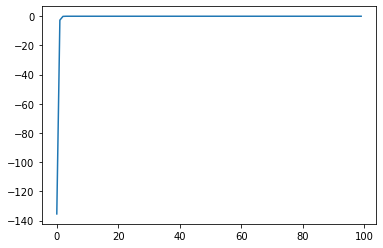

In [72]:
plt.plot(differences[-1])

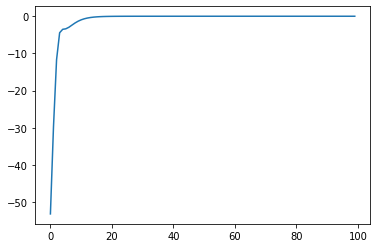

In [73]:
plt.plot(differences[-2])

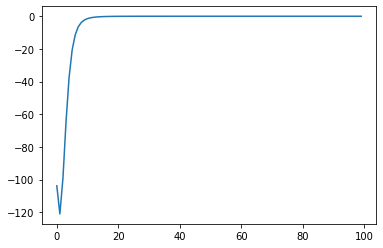

In [74]:
plt.plot(differences[-3])

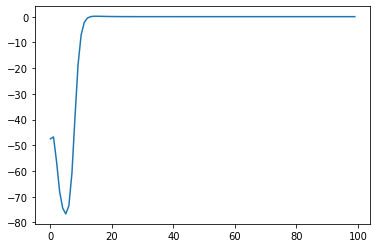

In [75]:
plt.plot(differences[-4])

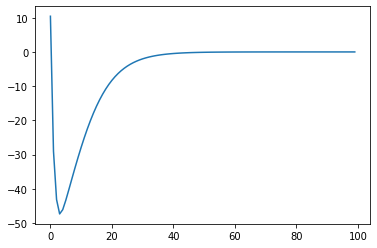

In [76]:
plt.plot(differences[-5])